# Project Description and Goals
Across the United States, there are altercations that result in killings by police officers, whether on-duty or off-duty. Each case is considered as a person dying from being shot, beaten, restrained, intentionally hit by a police vehicle, pepper sprayed, tasered, or otherwise harmed by police. 

For our capstone, we are addressing the issue of police violence that has become a heated topic throughout the country in the recent years. As a team, we will be attempting to help law enforcement agencies spot risk factors so they may step in before risk transforms into actual harm.  

The open-sourced dataset we acquired from [Mapping Police Violence](https://mappingpoliceviolence.org/aboutthedata) has gathered over 9000 police killings from January 2013 to May 2021. Top drivers of civilian fatalities identified will shed light on changes to be made to save more lives. Then, we will use the features to apply to our classification models predicting the threat level of the victim (attacker or not).

### Objectives for this project include:
- Identifying the drivers of civilian fatalities. 
- Documenting the process and analysis throughout the data science pipeline.
- Constructing a classification model that can predict what the victim's threat level is, given the features of the dataset.
- Deliverables:
    - README.md file containing overall project information. 
    - A well-documented jupyter notebook detailing the data science pipeline process.
    - Python modules that automate the data acquisition, preparation, and exploration process.

### Pipeline Process:
1. Acquire
2. Prepare
3. Explore
4. Model/Evaluate
5. Deliver

### Initial Hypotheses:
- How many fatalities happened as a result of an attack by the civilian? (alleged threat level)
- What are the fatalities by state: % killings vs pop
- Is race a factor?
- Does the police officer having a bodycam make a difference?
- Where and what areas result in more killings?
- What is happening in suburban fatalities?
- Do symptoms of mental illness play a role in threat level?


***
### Project Imports

In [1]:
import pandas as pd
import numpy as np

# Helper Functions
import wrangle as w 
import explore as exp
from explore import rfe, split, select_kbest

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Hypothesis tests
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

# Split data
from sklearn.model_selection import train_test_split

#Feature Engineering
from sklearn.feature_selection import SelectKBest, f_regression, chi2
from sklearn.feature_selection import RFE

# Evaluate models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support 

# Create models for classification ML:
# Decision Tree  
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# K-Nearest Neighbor(KNN)  
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression
from sklearn.linear_model import LogisticRegression

***
# Data Acquisition


In [2]:
# acquire data from MPV website's downloaded dataset
df = pd.read_excel('data.xlsx')
df.head()

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48
0,Kalon Horton,29,Male,Black,NaN,2021-05-09,NaN,Lancaster,TX,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Name withheld by police,NaN,Male,Unknown Race,NaN,2021-05-09,90 S. Main St.,Leicester,MA,1524.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Jeffrey Mark Murray,62,Male,Unknown Race,NaN,2021-05-09,NaN,Greenville,SC,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Everton Brown,56,Male,Unknown Race,NaN,2021-05-08,NaN,Baltimore,MD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Felix Jerry Marquez,34,Male,Hispanic,NaN,2021-05-08,NaN,Riverside,CA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



### Initial Data Summarization

In [3]:
# rows and columns
df.shape

(9147, 49)

In [4]:
# list of column names and data types with information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9147 entries, 0 to 9146
Data columns (total 49 columns):
 #   Column                                                                                                                                                                      Non-Null Count  Dtype         
---  ------                                                                                                                                                                      --------------  -----         
 0   Victim's name                                                                                                                                                               9147 non-null   object        
 1   Victim's age                                                                                                                                                                9138 non-null   object        
 2   Victim's gender                                         

In [5]:
# check nulls
df.isnull().sum()

Victim's name                                                                                                                                                                    0
Victim's age                                                                                                                                                                     9
Victim's gender                                                                                                                                                                 10
Victim's race                                                                                                                                                                    0
URL of image of victim                                                                                                                                                        4265
Date of Incident (month/day/year)                                                                        

In [6]:
# specify useless columns and what to exclude for counts
useless_columns = df.columns[35:]
exclusions = ["Victim's name", 
"URL of image of victim", 
"Date of Incident (month/day/year)", 
"Street Address of Incident", 
"City", "State", "Zipcode", "County", 
"Agency responsible for death", "ORI Agency Identifier (if available)", 
"A brief description of the circumstances surrounding the death", 
"Link to news article or photo of official document", 
"Link to news article or photo of official document", 
"WaPo ID (If included in WaPo database)", 
"MPV ID", 
"Fatal Encounters ID", 
"Names of Officers Involved (DRAFT)"]

# getting value counts for specific columns
for column in df.columns:
    if column not in exclusions and column not in useless_columns:
        print(column.upper())
        print(df[column].value_counts())
        print("-------------------------------------")

VICTIM'S AGE
Unknown    331
25         299
27         294
31         290
28         289
          ... 
88           1
93           1
95           1
107          1
40s          1
Name: Victim's age, Length: 89, dtype: int64
-------------------------------------
VICTIM'S GENDER
Male           8668
Female          453
Transgender       9
Unknown           6
Male              1
Name: Victim's gender, dtype: int64
-------------------------------------
VICTIM'S RACE
White                     3993
Black                     2306
Hispanic                  1631
Unknown Race               896
Asian                      135
Native American            130
Pacific Islander            52
Unknown race                 2
Asian/Pacific Islander       1
Hispanic                     1
Name: Victim's race, dtype: int64
-------------------------------------
CAUSE OF DEATH
Gunshot                                    8434
Gunshot, Taser                              273
Taser                                     

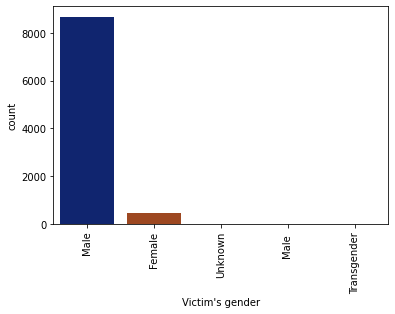

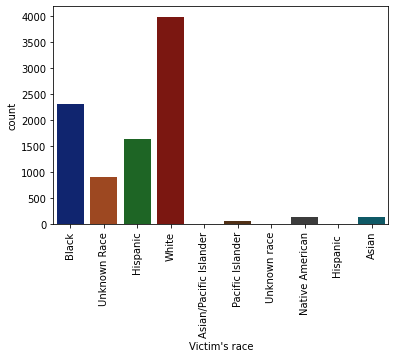

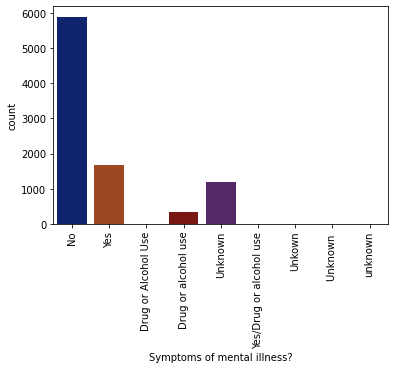

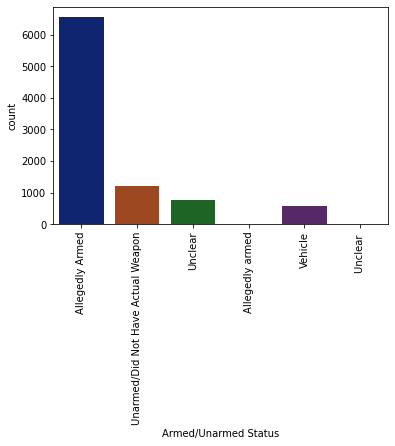

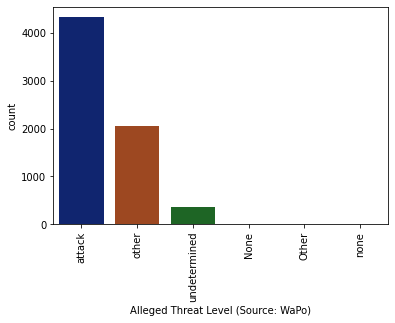

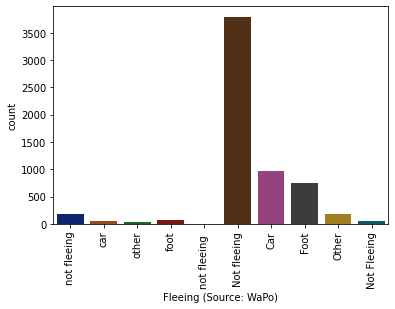

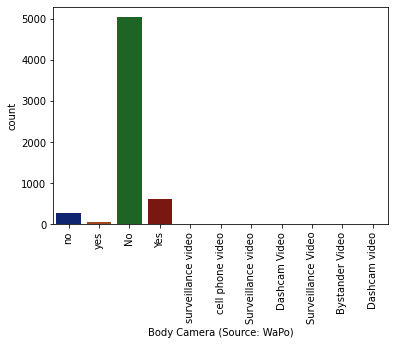

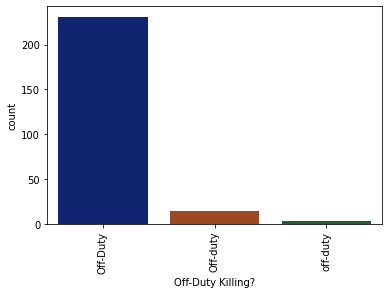

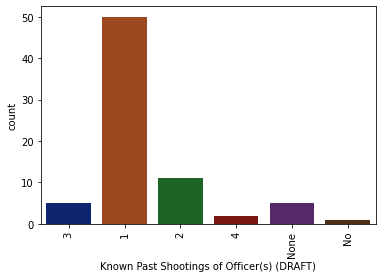

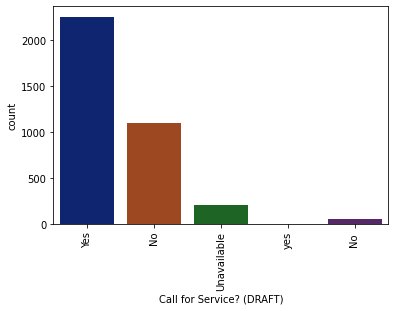

In [7]:
# specify more columns to exclude for univariate distributions
more_exclusions = ["Victim's age", 
"Cause of death", 
"Official disposition of death (justified or other)", 
"Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)", 
"Encounter Type (DRAFT)", 
"Initial Reported Reason for Encounter (DRAFT)", 
"Criminal Charges?",
"Race of Officers Involved (DRAFT)", 
"Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )"]

# univariate distributions
for column in df.columns:
    if column not in exclusions and column not in useless_columns and column not in more_exclusions:
        sns.countplot(x=df[column], data=df, palette = 'dark')
        plt.xticks(rotation='vertical')
        plt.show()

### Takeaways
- There are a couple of unnecessary columns (begin with `Unnamed:`).
- Messy column names need to be renamed for better readability.
- A lot of columns are not needed due to nulls/unusable and will need to be dropped. 
- Most values in each column have a wide variety of text variation. These should be lowercased, stripped, and grouped. 
- Many nulls in dataset that need to be filled in or dropped.
- Dummy variables and encoding needs to be done to pretty much all of the dataset in order to model/evaluate. 
- Possibly a good idea to create age bins.
- Possible exploration with time series. Might be setting as datetime index.


***
# Data Preparation

In [8]:
#grab cleaned data frame from wrangle.py
df = w.wrangle_data(cached=False)
df.head()

,age,gender,race,date,city,state,zipcode,county,agency_responsible,cause_of_death,...,age_bins,unknown,under 12,12-17,18-24,25-34,35-44,45-54,55-64,65+
7,52,male,unknown race,2021-05-07,rutledge,tn,37861.0,grainger,"bean station police department, rutledge polic...",gunshot,...,45-54,0,0,0,0,0,0,1,0,0
8,47,male,white,2021-05-06,san andreas,ca,95249.0,calaveras,calaveras county sheriff's office,gunshot,...,45-54,0,0,0,0,0,0,1,0,0
9,49,male,white,2021-05-05,las vegas,nv,89104.0,clark,las vegas metropolitan police department,gunshot,...,45-54,0,0,0,0,0,0,1,0,0
10,27,male,black,2021-05-04,mesquite,tx,75150.0,dallas,mesquite police department,gunshot,...,25-34,0,0,0,0,1,0,0,0,0
12,1,male,black,2021-05-03,biloxi,ms,39532.0,harrison,biloxi police department,gunshot,...,under 12,0,1,0,0,0,0,0,0,0


In [9]:
#double check no nulls
df.isnull().sum()

age                                            0
gender                                         0
race                                           0
date                                           0
city                                           0
state                                          0
zipcode                                        0
county                                         0
agency_responsible                             0
cause_of_death                                 0
description_of_circumstances                   0
official_disposition                           0
criminal_charges_filed                         0
mental_illness                                 0
armed_unarmed_status                           0
alleged_weapon                                 0
alleged_threat_lvl                             0
fleeing                                        0
body_camera                                    0
geography                                      0
encounter_type_draft

In [10]:
#double check data types
df.dtypes

age                                                     int64
gender                                                 object
race                                                   object
date                                           datetime64[ns]
city                                                   object
state                                                  object
zipcode                                               float64
county                                                 object
agency_responsible                                     object
cause_of_death                                         object
description_of_circumstances                           object
official_disposition                                   object
criminal_charges_filed                                 object
mental_illness                                         object
armed_unarmed_status                                   object
alleged_weapon                                         object
alleged_

### Takeaway
- Data is ready to be explored, modeled, and evaluated.

***
# Data Exploration

In [11]:
#split the data using the split function in explore.py
train, validate, test = split(df, stratify_by="alleged_threat_lvl")

#check split datasets
print('overall shape of dataframe:', df.shape)
print('train:', train.shape)
print('validate:', validate.shape)
print('test:', test.shape)

#work w/ training data
train.head()

overall shape of dataframe: (8634, 60)
train: (4834, 60)
validate: (2073, 60)
test: (1727, 60)


,age,gender,race,date,city,state,zipcode,county,agency_responsible,cause_of_death,...,age_bins,unknown,under 12,12-17,18-24,25-34,35-44,45-54,55-64,65+
1554,25,male,black,2019-12-19,tempe,az,85281.0,maricopa,arizona department of public safety,gunshot,...,25-34,0,0,0,0,1,0,0,0,0
7137,26,male,hispanic,2014-11-16,east los angeles,ca,90022.0,los angeles,los angeles county sheriff's department,gunshot,...,25-34,0,0,0,0,1,0,0,0,0
2043,23,male,white,2019-07-09,cleveland,oh,44144.0,cuyahoga,brooklyn police department,gunshot,...,18-24,0,0,0,1,0,0,0,0,0
8579,37,male,hispanic,2013-07-02,las cruces,nm,88005.0,dona ana,las cruces police department,gunshot,...,35-44,0,0,0,0,0,1,0,0,0
8556,27,male,white,2013-07-08,sewickley,pa,15143.0,allegheny,"sewickley police department, allegheny county ...",gunshot,...,25-34,0,0,0,0,1,0,0,0,0


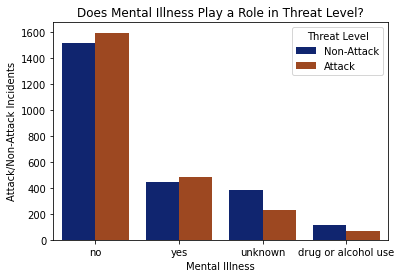

In [12]:
ax = sns.countplot(data=train, x='mental_illness', hue='alleged_threat_lvl', palette = 'dark')

legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Non-Attack','Attack'], 
          bbox_to_anchor=(1,1), 
          title='Threat Level')
          
plt.title('Does Mental Illness Play a Role in Threat Level?')
plt.xlabel('Mental Illness')
plt.ylabel('Attack/Non-Attack Incidents')
plt.show()

### Takeaways
- People with no mental illness have been characterized as having an 'attack' threat level more often than not being attackers. 
- There are alot more attacks/non-attacks overall for people not characterized as having a mental illnesses

In [13]:
#hyp testing: Visualize if symptoms of mental illness play a role in threat level
exp.chi2_matts(train, 'mental_illness', 'alleged_threat_lvl', alpha=0.05)

Observed

[[ 114   66]
 [1514 1596]
 [ 382  232]
 [ 449  481]]
---
Expected

[[  91.56392222   88.43607778]
 [1582.02110054 1527.97889946]
 [ 312.33471245  301.66528755]
 [ 473.08026479  456.91973521]]
---

chi^2 = 51.2639
p     = 0.0000

Because the p-value: 0.0 is less than alpha: 0.05, we can reject the null hypothesis


### Takeaway
- Chi^2 rejected the null hypothesis meaning we accept that mental status is dependent on alleged threat level.

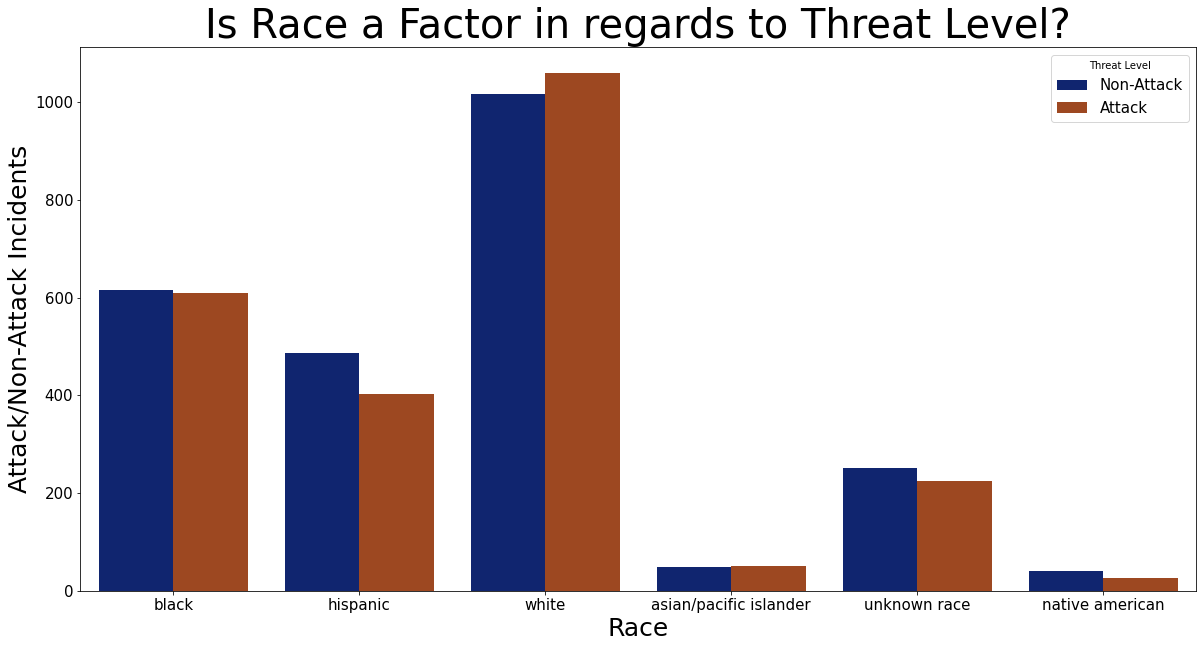

In [14]:
#visualize race vs alleged threat level
plt.figure(figsize=(20, 10))
ax = sns.countplot(data=train, x='race', hue='alleged_threat_lvl', palette = 'dark')

legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Non-Attack','Attack'],  
          title='Threat Level', fontsize=15)
          
plt.title('Is Race a Factor in regards to Threat Level?', fontsize = 40)
plt.xlabel('Race', fontsize = 25)
plt.ylabel('Attack/Non-Attack Incidents', fontsize = 25)
ax.tick_params(labelsize=15)
plt.show()

### Takeaways
- It appears as though all races are more often attacks than not
- White race shows the most attackers/non-attackers
- Black and hispanic race that result in non-attack threat level are almost at same level. 
- Asian, Native American, and Pacific Islander races have the least amount of attack/non-attack threat levels.

In [15]:
exp.chi2_matts(train, 'race', 'alleged_threat_lvl', alpha=0.05)

Observed

[[  49   50]
 [ 616  610]
 [ 486  403]
 [  40   27]
 [ 251  225]
 [1017 1060]]
---
Expected

[[  50.36015722   48.63984278]
 [ 623.65204799  602.34795201]
 [ 452.22403806  436.77596194]
 [  34.0821266    32.9178734 ]
 [ 242.13570542  233.86429458]
 [1056.5459247  1020.4540753 ]]
---

chi^2 = 11.1651
p     = 0.0482

Because the p-value: 0.0482 is less than alpha: 0.05, we can reject the null hypothesis


### Takeaway
- Chi^2 rejected the null hypothesis meaning we accept that race is dependent on alleged threat level.

In [16]:
#add other visualizations from team's individual notebooks

***
# Data Modeling and Evaluation

In [17]:
#set up X inputs and y target variable for each split
X_train = train.drop(columns=['alleged_threat_lvl'])
y_train = train.alleged_threat_lvl

X_validate = validate.drop(columns=['alleged_threat_lvl'])
y_validate = validate.alleged_threat_lvl

X_test = test.drop(columns=['alleged_threat_lvl'])
y_test = test.alleged_threat_lvl

In [18]:
#baseline prediction: the most prevalent class in training dataset(the mode)
train.alleged_threat_lvl.value_counts()

0.0    2459
1.0    2375
Name: alleged_threat_lvl, dtype: int64

In [19]:
#baseline model would be to predict 0 since it is most prevalant
#baseline accuracy:
baseline_accuracy = (train.alleged_threat_lvl == 0).mean()

print(f'baseline accuracy: {baseline_accuracy: .2}')

baseline accuracy:  0.51


In [20]:
# dropping columns that are not numeric datatypes
dropcols = ['date',
 'gender',
 'race',
 'city',
 'state',
 'zipcode',
 'county',
 'agency_responsible',
 'cause_of_death',
 'description_of_circumstances',
 'official_disposition',
 'criminal_charges_filed',
 'mental_illness',
 'armed_unarmed_status',
 'alleged_threat_lvl',
 'alleged_weapon',
 'fleeing',
 'geography',
 'encounter_type_draft',
 'initial_reported_reason_for_encounter_draft',
 'known_past_shootings_of_officer_draft',
 'age_bins']

X_train = train.drop(columns=dropcols)

X_validate = validate.drop(columns=dropcols)

X_test = test.drop(columns=dropcols)


In [21]:
X_train.columns

Index(['age', 'body_camera', 'is_female', 'is_male', 'is_transgender',
       'was_fleeing', 'was_not fleeing ', 'was_allegedly_armed', 'was_unarmed',
       'was_vehicle', 'was_domestic_disturbance',
       'was_mental_health_welfare_check', 'was_person_with_a_weapon',
       'was_traffic_stop', 'was_violent_crime_part_1',
       'is_asian/pacific islander', 'is_black', 'is_hispanic',
       'is_native american', 'is_unknown race', 'is_white',
       'mntlill_drug or alcohol use', 'mntlill_no', 'mntlill_unknown',
       'mntlill_yes', 'rural', 'suburban', 'urban', 'cod_lethal', 'unknown',
       'under 12', '12-17', '18-24', '25-34', '35-44', '45-54', '55-64',
       '65+'],
      dtype='object')

### Feature Engineering
#### Select K Best
- Uses statistical tests to determine each feature's usefulness in predicting the target variable. 
- Ranks the features and then select the K best features.

In [22]:
f_features = select_kbest(X_train, y_train, 15)
f_features

['age',
 'body_camera',
 'was_fleeing',
 'was_allegedly_armed',
 'was_unarmed',
 'was_domestic_disturbance',
 'was_mental_health_welfare_check',
 'was_traffic_stop',
 'was_violent_crime_part_1',
 'mntlill_drug or alcohol use',
 'mntlill_no',
 'mntlill_unknown',
 'rural',
 'under 12',
 '55-64']

#### Recursive Feature Elimination (RFE)
- Recursively removes attributes to meet the number of required features and then builds a model on those attributes that remain to see if you can you match or improve performance with a smaller subset.

In [23]:
rfe_features = rfe(X_train, y_train, 15)
rfe_features

['is_male',
 'is_transgender',
 'was_fleeing',
 'was_allegedly_armed',
 'was_unarmed',
 'was_vehicle',
 'was_domestic_disturbance',
 'was_mental_health_welfare_check',
 'was_person_with_a_weapon',
 'was_traffic_stop',
 'was_violent_crime_part_1',
 'is_native american',
 'mntlill_no',
 'cod_lethal',
 'under 12']

#### Combined Features from Select K Best and RFE

In [24]:
combo_feats = list(set(f_features + rfe_features))
print(len(combo_feats))
combo_feats

21


['mntlill_drug or alcohol use',
 'was_vehicle',
 'is_transgender',
 'was_domestic_disturbance',
 'was_unarmed',
 'was_traffic_stop',
 'was_person_with_a_weapon',
 'rural',
 'was_fleeing',
 'was_mental_health_welfare_check',
 '55-64',
 'mntlill_unknown',
 'was_allegedly_armed',
 'cod_lethal',
 'body_camera',
 'mntlill_no',
 'under 12',
 'is_native american',
 'was_violent_crime_part_1',
 'age',
 'is_male']

In [25]:
#specify combined features that reduces multicollinearity
combo_feats = ['55-64',
 'is_native american',
 'mntlill_no',
 'under 12',
 'was_traffic_stop',
 'body_camera',
 'age',
 'was_allegedly_armed',
 'is_black',
 'was_domestic_disturbance',
 'was_fleeing',
 'cod_lethal',
 'was_mental_health_welfare_check',
 'is_white',
 'was_violent_crime_part_1',
 'was_vehicle',
 'mntlill_drug or alcohol use',
 'is_transgender',
 'is_female']
 
print(len(combo_feats))

19


## Decision Tree

In [26]:
#create 1st Decision Tree model (specifying max_depth argument and f_features)
dt1 = DecisionTreeClassifier(max_depth=3, random_state=123)

#fit model on f_features
dt1.fit(X_train[f_features], y_train)

#get predictions from model
y_pred = dt1.predict(X_train[f_features])

#compare to baseline
print("Baseline is", round(baseline_accuracy, 2))
print("----------------")
print("Model trained on all features:")
print('Accuracy of 1st Decision Tree classifier on f_features: {:.2f}'
     .format(dt1.score(X_train[f_features], y_train)))

Baseline is 0.51
----------------
Model trained on all features:
Accuracy of 1st Decision Tree classifier on f_features: 0.71


In [27]:
#create 2nd decision tree model (specifying max_depth argument and rfe_features)
dt2 = DecisionTreeClassifier(max_depth=3, random_state=123)

#fit model on rfe_features
dt2.fit(X_train[rfe_features], y_train)

#get predictions from model
y_pred = dt2.predict(X_train[rfe_features])

#compare to baseline and 1st model
print("Baseline is", round(baseline_accuracy, 2))
print("----------------")
print('Accuracy of 1st Decision Tree classifier on f_features: {:.2f}'
     .format(dt1.score(X_train[f_features], y_train)))
print("--------------------------------------------------------------")

print('Accuracy of 2nd Decision Tree classifier on rfe_features: {:.2f}'
     .format(dt2.score(X_train[rfe_features], y_train)))

Baseline is 0.51
----------------
Accuracy of 1st Decision Tree classifier on f_features: 0.71
--------------------------------------------------------------
Accuracy of 2nd Decision Tree classifier on rfe_features: 0.71


In [28]:
#create 3rd decision tree model (specifying max_depth argument and combo_feats)
dt3 = DecisionTreeClassifier(max_depth=3, random_state=123)

#fit model on combo_feats
dt3.fit(X_train[combo_feats], y_train)

#get predictions from model
y_pred = dt3.predict(X_train[combo_feats])

#compare to baseline, 1st model, and 2nd model
print("Baseline is", round(baseline_accuracy, 2))
print("----------------")
print('Accuracy of 1st Decision Tree classifier on f_features: {:.2f}'
     .format(dt1.score(X_train[f_features], y_train)))
print("--------------------------------------------------------------")
print('Accuracy of 2nd Decision Tree classifier on rfe_features: {:.2f}'
     .format(dt2.score(X_train[rfe_features], y_train)))
print("--------------------------------------------------------------")
print('Accuracy of 3rd Decision Tree classifier on combo_feats: {:.2f}'
     .format(dt3.score(X_train[combo_feats], y_train)))

Baseline is 0.51
----------------
Accuracy of 1st Decision Tree classifier on f_features: 0.71
--------------------------------------------------------------
Accuracy of 2nd Decision Tree classifier on rfe_features: 0.71
--------------------------------------------------------------
Accuracy of 3rd Decision Tree classifier on combo_feats: 0.71


## Random Forest

In [29]:
#create 1st Random Forest model (specifying max_depth/min_samples_leaf arguments and f_features)
rf1 = RandomForestClassifier(max_depth=5, min_samples_leaf=3, random_state=123)

#fit model on f_features
rf1.fit(X_train[f_features], y_train)

#get predictions from model
y_pred = rf1.predict(X_train[f_features])

#compare to baseline
print("Baseline is", round(baseline_accuracy, 2))
print("----------------")
print("Model trained on all features:")
print('Accuracy of 1st Random Forest classifier on f_features: {:.2f}'
     .format(rf1.score(X_train[f_features], y_train)))

Baseline is 0.51
----------------
Model trained on all features:
Accuracy of 1st Random Forest classifier on f_features: 0.71


In [30]:
#create 2nd Random Forest model (specifying max_depth/min_samples_leaf arguments and f_features)
rf2 = RandomForestClassifier(max_depth=5, min_samples_leaf=3, random_state=123)

#fit model on rfe_features
rf2.fit(X_train[rfe_features], y_train)

#get predictions from model
y_pred = rf2.predict(X_train[rfe_features])

#compare to baseline and 1st model
print("Baseline is", round(baseline_accuracy, 2))
print("----------------")
print('Accuracy of 1st Random Forest classifier on f_features: {:.2f}'
     .format(rf1.score(X_train[f_features], y_train)))
print("--------------------------------------------------------------")

print('Accuracy of 2nd Random Forest classifier on rfe_features: {:.2f}'
     .format(rf2.score(X_train[rfe_features], y_train)))

Baseline is 0.51
----------------
Accuracy of 1st Random Forest classifier on f_features: 0.71
--------------------------------------------------------------
Accuracy of 2nd Random Forest classifier on rfe_features: 0.72


In [31]:
#create 3rd Random Forest model (specifying max_depth/min_samples_leaf arguments and combo_feats)
rf3 = RandomForestClassifier(max_depth=5, min_samples_leaf=3, random_state=123)

#fit model on combo_feats
rf3.fit(X_train[combo_feats], y_train)

#get predictions from model
y_pred = rf3.predict(X_train[combo_feats])

#compare to baseline, 1st model, and 2nd model
print("Baseline is", round(baseline_accuracy, 2))
print("----------------")
print('Accuracy of 1st Random Forest classifier on f_features: {:.2f}'
     .format(rf1.score(X_train[f_features], y_train)))
print("--------------------------------------------------------------")
print('Accuracy of 2nd Random Forest classifier on rfe_features: {:.2f}'
     .format(rf2.score(X_train[rfe_features], y_train)))
print("--------------------------------------------------------------")
print('Accuracy of 3rd Random Forest classifier on combo_feats: {:.2f}'
     .format(rf3.score(X_train[combo_feats], y_train)))

Baseline is 0.51
----------------
Accuracy of 1st Random Forest classifier on f_features: 0.71
--------------------------------------------------------------
Accuracy of 2nd Random Forest classifier on rfe_features: 0.72
--------------------------------------------------------------
Accuracy of 3rd Random Forest classifier on combo_feats: 0.72


## K-Nearest Neighbor (KNN)

In [32]:
#create 1st KNN model (specifying n_neighbors argument and f_features)
knn1 = KNeighborsClassifier(n_neighbors=20)

#fit model on f_features
knn1.fit(X_train[f_features], y_train)

#get predictions from model
y_pred = knn1.predict(X_train[f_features])

#compare to baseline
print("Baseline is", round(baseline_accuracy, 2))
print("----------------")
print("Model trained on all features:")
print('Accuracy of 1st Decision Tree classifier on f_features: {:.2f}'
     .format(knn1.score(X_train[f_features], y_train)))

Baseline is 0.51
----------------
Model trained on all features:
Accuracy of 1st Decision Tree classifier on f_features: 0.69


In [33]:
#create 2nd KNN model (specifying n_neighbors argument and rfe_features)
knn2 = KNeighborsClassifier(n_neighbors=20)

#fit model on rfe_features
knn2.fit(X_train[rfe_features], y_train)

#get predictions from model
y_pred = knn2.predict(X_train[rfe_features])

#compare to baseline and 1st model
print("Baseline is", round(baseline_accuracy, 2))
print("----------------")
print('Accuracy of 1st KNN classifier on f_features: {:.2f}'
     .format(knn1.score(X_train[rfe_features], y_train)))
print("--------------------------------------------------------------")

print('Accuracy of 2nd KNN classifier on rfe_features: {:.2f}'
     .format(knn2.score(X_train[rfe_features], y_train)))

Baseline is 0.51
----------------
Accuracy of 1st KNN classifier on f_features: 0.55
--------------------------------------------------------------
Accuracy of 2nd KNN classifier on rfe_features: 0.72


In [34]:
#create 3rd KNN model (specifying n_neighbors argument and combo_feats)
knn3 = KNeighborsClassifier(n_neighbors=20)

#fit model on combo_feats
knn3.fit(X_train[combo_feats], y_train)

#get predictions from model
y_pred = knn3.predict(X_train[combo_feats])

#compare to baseline, 1st model, and 2nd model
print("Baseline is", round(baseline_accuracy, 2))
print("----------------")
print('Accuracy of 1st KNN classifier on f_features: {:.2f}'
     .format(knn1.score(X_train[f_features], y_train)))
print("--------------------------------------------------------------")
print('Accuracy of 2nd KNN classifier on rfe_features: {:.2f}'
     .format(knn2.score(X_train[rfe_features], y_train)))
print("--------------------------------------------------------------")
print('Accuracy of 3rd KNN classifier on combo_feats: {:.2f}'
     .format(knn3.score(X_train[combo_feats], y_train)))

Baseline is 0.51
----------------
Accuracy of 1st KNN classifier on f_features: 0.69
--------------------------------------------------------------
Accuracy of 2nd KNN classifier on rfe_features: 0.72
--------------------------------------------------------------
Accuracy of 3rd KNN classifier on combo_feats: 0.70


## Logistic Regression

In [35]:
#create 1st Logistic Regression model (default parameters, specifying f_features)
logit1 = LogisticRegression(random_state=123)

#fit model on f_features
logit1.fit(X_train[f_features], y_train)

#get predictions from model
y_pred = logit1.predict(X_train[f_features])

#compare to baseline
print("Baseline is", round(baseline_accuracy, 2))
print("----------------")
print("Model trained on all features:")
print('Accuracy of 1st Logistic Regression classifier on f_features: {:.2f}'
     .format(logit1.score(X_train[f_features], y_train)))

Baseline is 0.51
----------------
Model trained on all features:
Accuracy of 1st Logistic Regression classifier on f_features: 0.70


In [36]:
#create 2nd Logistic Regression model (default parameters, specifying rfe_features)
logit2 = LogisticRegression(random_state=123)

#fit model on rfe_features
logit2.fit(X_train[rfe_features], y_train)

#get predictions from model
y_pred = logit2.predict(X_train[rfe_features])

#compare to baseline and 1st model
print("Baseline is", round(baseline_accuracy, 2))
print("----------------")
print('Accuracy of 1st Logistic Regression classifier on f_features: {:.2f}'
     .format(logit1.score(X_train[f_features], y_train)))
print("--------------------------------------------------------------")

print('Accuracy of 2nd Logistic Regression classifier on rfe_features: {:.2f}'
     .format(logit2.score(X_train[rfe_features], y_train)))

Baseline is 0.51
----------------
Accuracy of 1st Logistic Regression classifier on f_features: 0.70
--------------------------------------------------------------
Accuracy of 2nd Logistic Regression classifier on rfe_features: 0.70


In [37]:
#create 3rd Logistic Regression model (default parameters, specifying combo_feats)
logit3 = LogisticRegression(random_state=123)

#fit model on combo_feats
logit3.fit(X_train[combo_feats], y_train)

#get predictions from model
y_pred = logit3.predict(X_train[combo_feats])

#compare to baseline, 1st model, and 2nd model
print("Baseline is", round(baseline_accuracy, 2))
print("----------------")
print('Accuracy of 1st Logistic Regression classifier on f_features: {:.2f}'
     .format(logit1.score(X_train[f_features], y_train)))
print("--------------------------------------------------------------")
print('Accuracy of 2nd Logistic Regression classifier on rfe_features: {:.2f}'
     .format(logit2.score(X_train[rfe_features], y_train)))
print("--------------------------------------------------------------")
print('Accuracy of 3rd Logistic Regression classifier on combo_feats: {:.2f}'
     .format(logit3.score(X_train[combo_feats], y_train)))

Baseline is 0.51
----------------
Accuracy of 1st Logistic Regression classifier on f_features: 0.70
--------------------------------------------------------------
Accuracy of 2nd Logistic Regression classifier on rfe_features: 0.70
--------------------------------------------------------------
Accuracy of 3rd Logistic Regression classifier on combo_feats: 0.70


### Top 3 Models on training data:
- 1st Decision Tree model (dt1) with score of 71% using f_features.
- 2nd Random Forest model (rf2) with score of 72% using rfe_features.
- 2nd KNN model (knn2) with score of 72% using rfe_features.

Next, compare scores to validate (out-of-sample data).

In [38]:
#dt1's metrics on validate

#evaluate on validate sample
y_pred = dt1.predict(X_validate[f_features])

#compare train to validate
print('Accuracy of 1st Decision Tree classifier on f_features: {:.2f}'
     .format(dt1.score(X_train[f_features], y_train)))
print("--------------------------------------------------------------")
print("1st Decision Tree classifier on validate set:")
print(classification_report(y_validate, y_pred))

Accuracy of 1st Decision Tree classifier on f_features: 0.71
--------------------------------------------------------------
1st Decision Tree classifier on validate set:
              precision    recall  f1-score   support

         0.0       0.73      0.68      0.70      1054
         1.0       0.69      0.74      0.71      1019

    accuracy                           0.71      2073
   macro avg       0.71      0.71      0.71      2073
weighted avg       0.71      0.71      0.71      2073



In [39]:
#rf2's metrics on validate

#evaluate on validate sample
y_pred = rf2.predict(X_validate[rfe_features])

#compare train to validate
print('Accuracy of 2nd Random Forest classifier on rfe_features: {:.2f}'
     .format(rf2.score(X_train[rfe_features], y_train)))
print("--------------------------------------------------------------")
print("2nd Random Forest classifier on validate set:")
print(classification_report(y_validate, y_pred))

Accuracy of 2nd Random Forest classifier on rfe_features: 0.72
--------------------------------------------------------------
2nd Random Forest classifier on validate set:
              precision    recall  f1-score   support

         0.0       0.75      0.69      0.71      1054
         1.0       0.70      0.76      0.73      1019

    accuracy                           0.72      2073
   macro avg       0.72      0.72      0.72      2073
weighted avg       0.72      0.72      0.72      2073



In [40]:
#knn2's metrics on validate

#evaluate on validate sample
y_pred = knn2.predict(X_validate[rfe_features])

#compare train to validate
print('Accuracy of 2nd KNN classifier on rfe_features: {:.2f}'
     .format(knn2.score(X_train[rfe_features], y_train)))
print("--------------------------------------------------------------")
print("2nd KNN classifier on validate set:")
print(classification_report(y_validate, y_pred))

Accuracy of 2nd KNN classifier on rfe_features: 0.72
--------------------------------------------------------------
2nd KNN classifier on validate set:
              precision    recall  f1-score   support

         0.0       0.74      0.68      0.71      1054
         1.0       0.70      0.75      0.72      1019

    accuracy                           0.71      2073
   macro avg       0.72      0.72      0.71      2073
weighted avg       0.72      0.71      0.71      2073



### Comparison to Validate 
- 1st Decision Tree model (dt1) with score of 71% using f_features.
    - Validate score: 71%
- 2nd Random Forest model (rf2) with score of 72% using rfe_features.
    - Validate score: 72%
- 2nd KNN model (knn2) with score of 72% using rfe_features.
    - Validate score: 71% 

    
Top Validation Model to move forward with Test:
- 


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=258e71fc-cf2b-48c3-8461-70ecd9787aa1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>